In [ ]:
import pandas as pd
from sklearn import decomposition


In [ ]:
df = pd.read_csv('/content/matrix.csv')

In [ ]:
df.rename(columns ={'Unnamed: 0': 'Sample'}, inplace=True)

In [ ]:
df.head()

,Sample,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11027,Unnamed: 11028,Unnamed: 11029,Unnamed: 11030,Unnamed: 11031,Unnamed: 11032,Unnamed: 11033,Unnamed: 11034,Unnamed: 11035,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
3,HG00100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR


In [ ]:
non_snp_columns = ['Sample', 'Population code']
snp_columns = df.drop (non_snp_columns, axis=1)

In [ ]:
matrix = snp_columns.to_numpy()

In [ ]:
print(matrix.shape)

(2504, 11035)


In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)


PCA(n_components=2)

In [ ]:
to_plot =pca.transform(matrix)
to_plot.shape

(2504, 2)

In [ ]:
import matplotlib.pyplot as plt

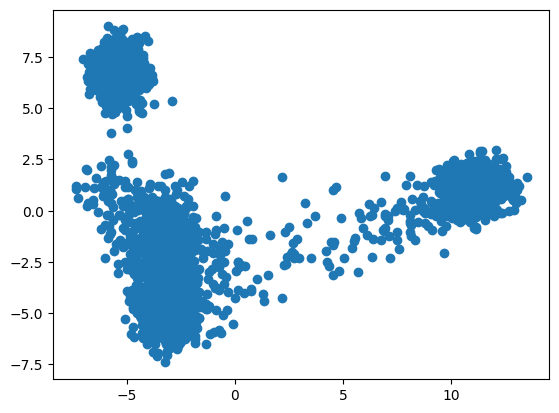

In [ ]:
plt.scatter(x=to_plot[:,0], y=to_plot[:,1]) # rough plot using matplot lib

In [ ]:
import altair as alt # works nicely with pandas

In [ ]:
df_plot = df[non_snp_columns].copy()

In [ ]:
df_plot['PC1']=to_plot[:,0]
df_plot['PC2']=to_plot[:,1]

In [ ]:
df_plot

,Sample,Population code,PC1,PC2
0,HG00096,GBR,-2.829911,-6.224382
1,HG00097,GBR,-3.297505,-6.022772
2,HG00099,GBR,-2.552067,-4.624475
3,HG00100,GBR,-3.533480,-5.705350
4,HG00101,GBR,-4.063304,-4.741604
...,...,...,...,...
2499,NA21137,GIH,-3.945841,-0.427531
2500,NA21141,GIH,-4.500771,-1.390272
2501,NA21142,GIH,-4.225763,0.226729
2502,NA21143,GIH,-2.392436,-0.293203


In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color = alt.Color('Population code', scale =alt.Scale(scheme='category20'))

)

alt.Chart(...)

In [ ]:
super_pop= pd.read_csv('/content/integrated_call_samples_v3.20130502.ALL.panel', sep='\t') #get the contenent instead of country

In [ ]:
super_pop.rename(columns={'sample':'Sample'}, inplace = True)

In [ ]:
df_plot =df_plot.merge(super_pop, on ='Sample', how = 'inner')

In [ ]:

title = alt.TitleParams('SNP Clustering Mirrors Geographic Location', anchor='middle')

alt.Chart(df_plot, title =title).mark_point().encode(
    x='PC1',
    y='PC2',
    color = alt.Color('super_pop', scale =alt.Scale(scheme='category20'),
                      legend=alt.Legend(title=None)
    ))

#

alt.Chart(...)